# IGP 5 Models - Feature removal - Both Dataset

In [1]:
# load functions in python file with magic command
%run ../code/model.py

import pandas as pd
output_csv_path = '../output/'

#### Interpretation for next round (reduced feature models)

#### Interpretation for next round (reduced feature models)

* `LightGBM` - **inactiveDay**, **activeDark**, **kurtosis**
* `XGBoost` - **inactiveLight**, **std**, **activeDark**, **activeNight**, **q1**
* `AdaBoost` - **inactiveDay**, **inactiveLight**, **activeDark**, **activeNight**, **std**
* `Gradient Boosting` -  **inactiveLight**, **kurtosis**, **activeNight**, **activeDark**
* `Random Forest` - **inactiveLight**, **median**, **activeDark**



In [2]:
# read from csv
both_X_train_scaled = pd.read_csv(output_csv_path + 'both_X_train_scaled.csv')
both_y_train = pd.read_csv(output_csv_path + 'both_y_train.csv').iloc[:, 0]

In [4]:
# print column namees and idx
for i, col_name in enumerate(both_X_train.columns):
    print(f"Col: {col_name}, Colnum: {i}")


Col: inactiveDay, Colnum: 0
Col: activeNight, Colnum: 1
Col: inactiveLight, Colnum: 2
Col: activeDark, Colnum: 3
Col: mean, Colnum: 4
Col: std, Colnum: 5
Col: median, Colnum: 6
Col: q1, Colnum: 7
Col: q3, Colnum: 8
Col: percent_zero, Colnum: 9
Col: kurtosis, Colnum: 10


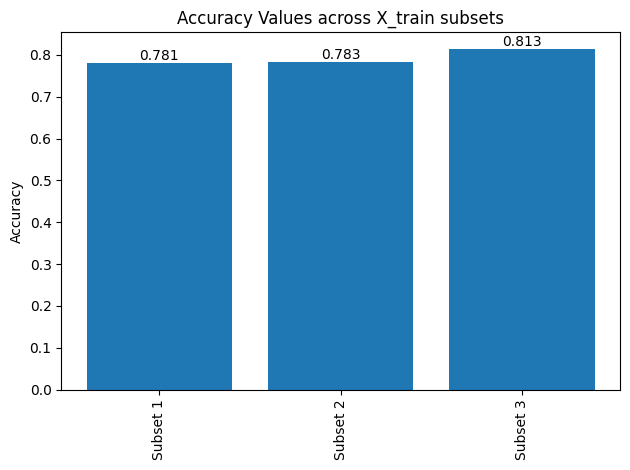

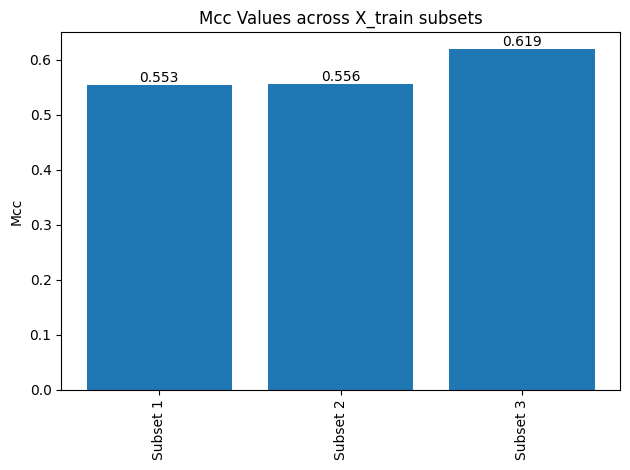

In [3]:
# lgbm
column_sets = [[2,3], [2,3,10 ], [2,3,9]]
model = [('LightGBM', LGBMClassifier(verbose=-1, random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

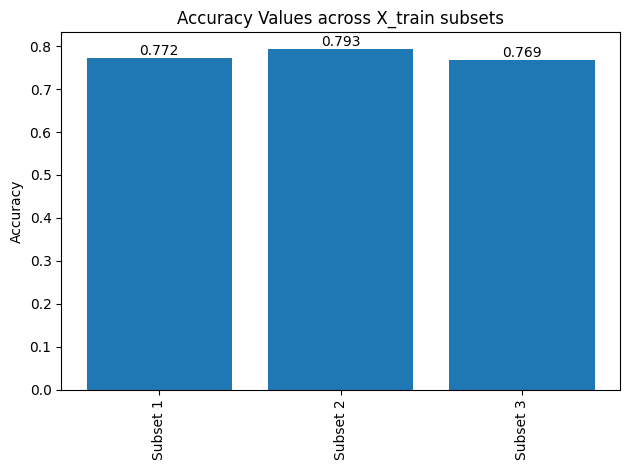

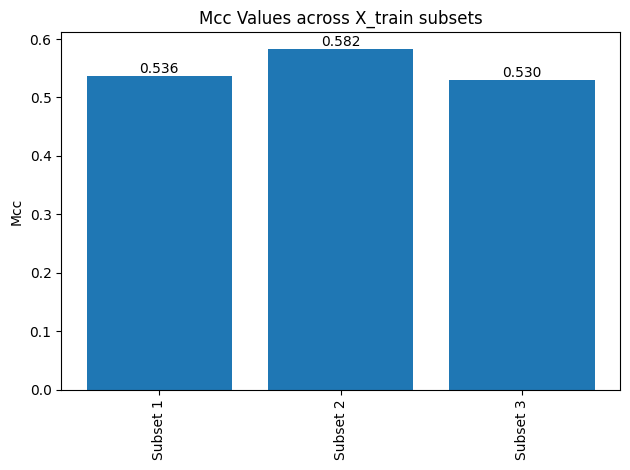

In [4]:
# xgb
column_sets = [[2,3], [2,3,5 ], [2,3,7]]
model = [('XGBoost', XGBClassifier(random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

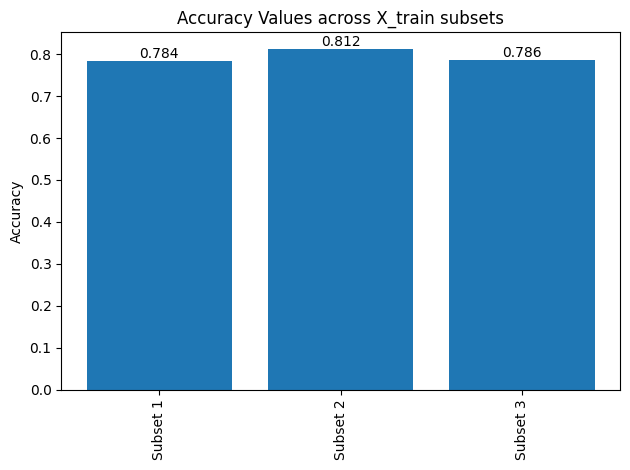

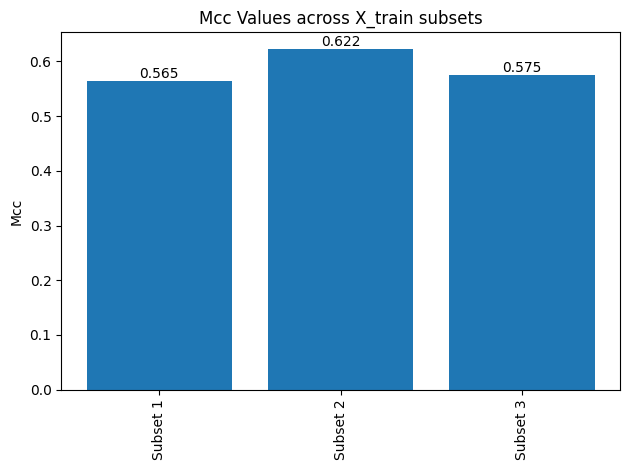

In [5]:
# ada
column_sets = [[2,3], [2,3,5 ], [2,3,7]]
model = [('AdaBoost', AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

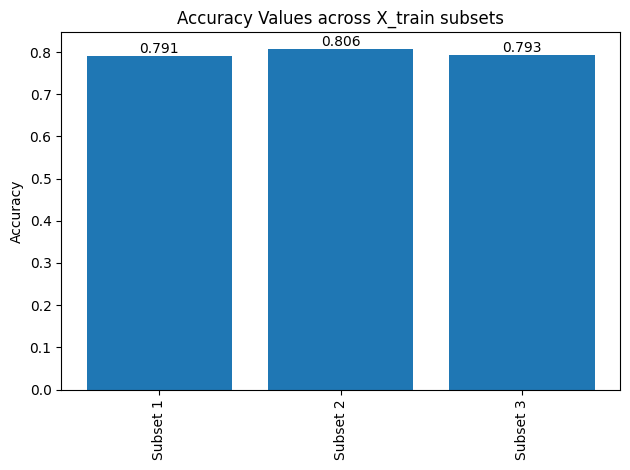

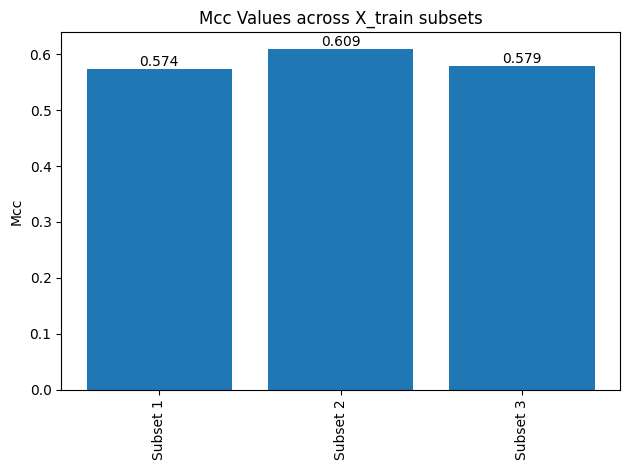

In [6]:
# gb
column_sets = [[2,3], [2,3,10 ], [2,3,7]]
model = [('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

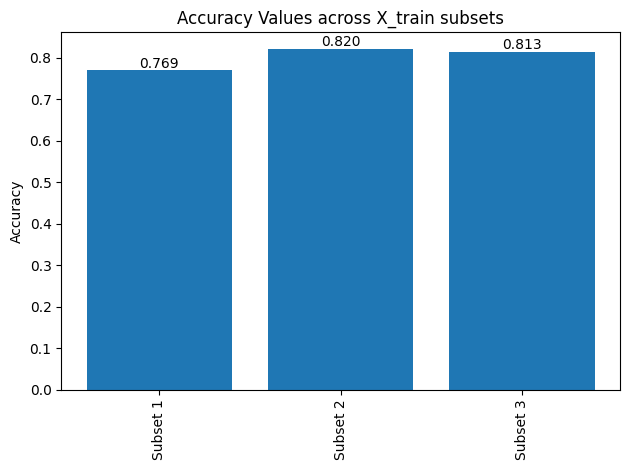

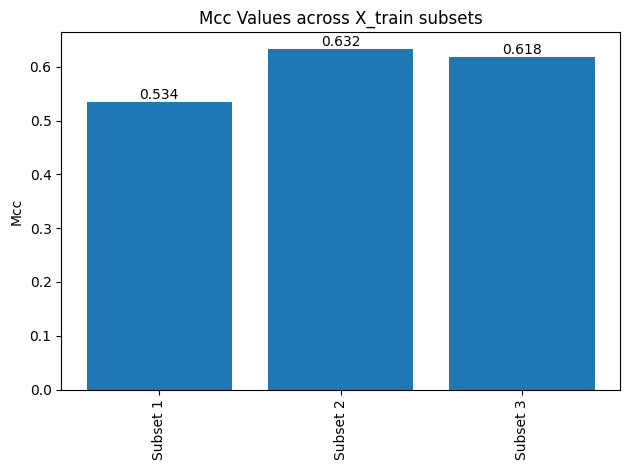

In [7]:
# rf
column_sets = [[2,3], [2,3,6 ], [2,3,9]]
model = [('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

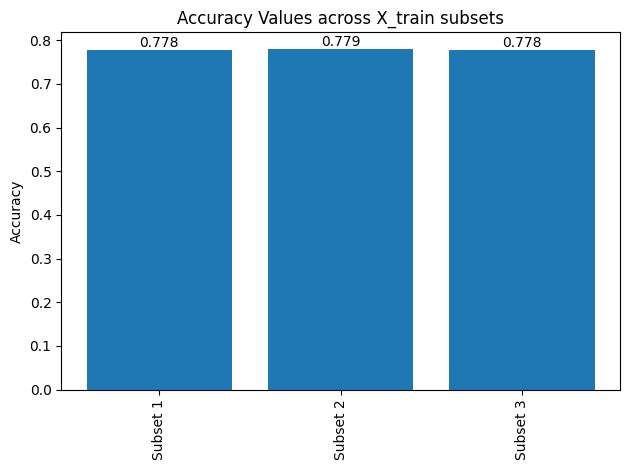

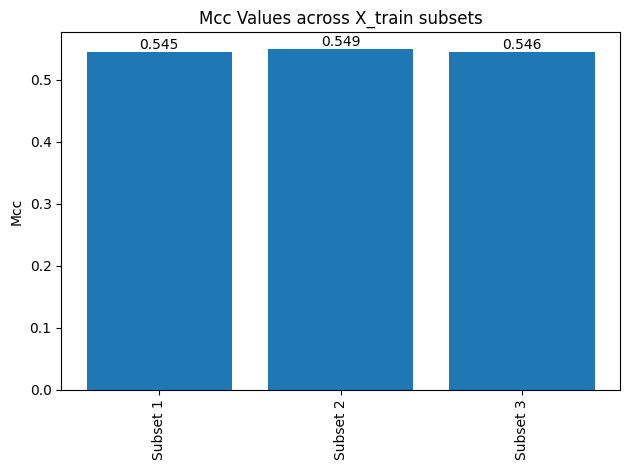

In [8]:
# svm-lin
column_sets = [[2,3], [2,3,4 ], [2,3,8]]
model = [('SVM linear', SVC(kernel='linear', random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

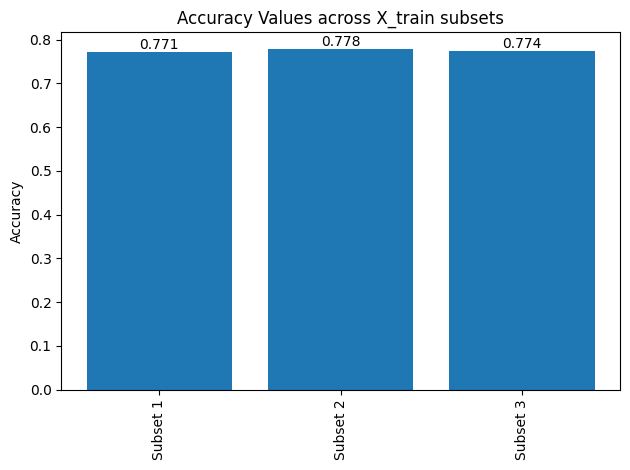

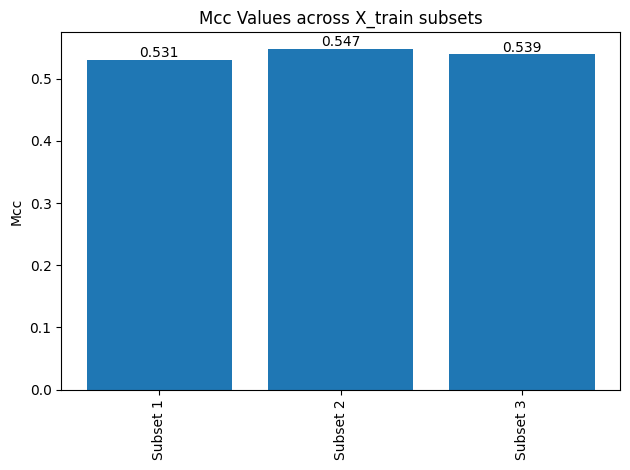

In [9]:
# svm-lin
column_sets = [[2,3], [2,3,4 ], [2,3,8]]
model = [('SVC linear', LinearSVC(dual=False, max_iter=10000, random_state=RANDOM_STATE))]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

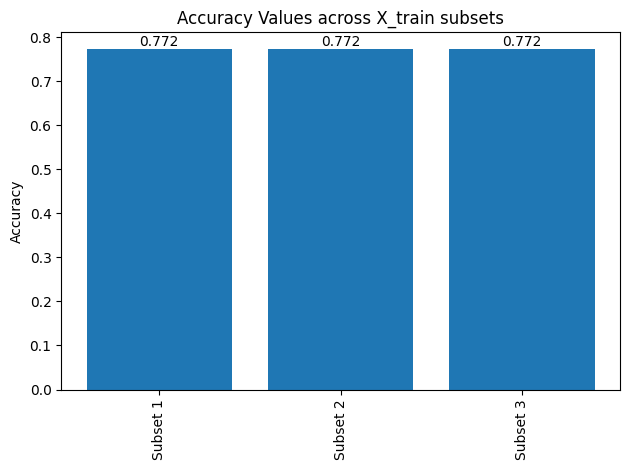

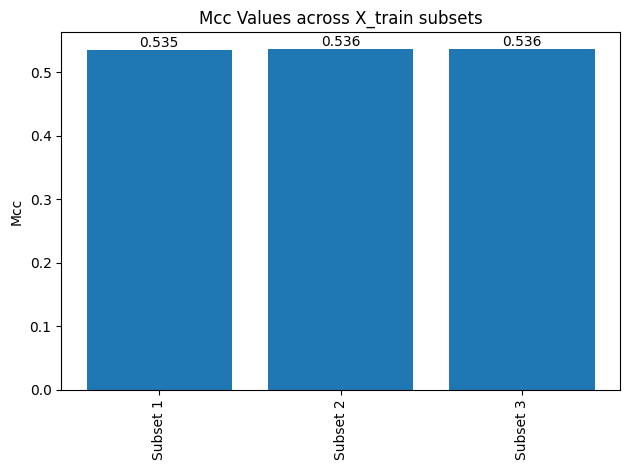

In [10]:
# svm-lin
column_sets = [[2,3], [2,3,4 ], [2,3,8]]
model = [('Naive Bayes', GaussianNB())]
model_evaluate_dicts(both_X_train_scaled, both_y_train, model, column_sets)

## Results

* Best 3 feature: 0.820 rf [2,3,6 ]
* Best 2 feature: 0.791 gb

## Discussion

* There is something going on with the four first features in terms of multicollinearity.
  * unstable coefficients
  * reduced interpretability
  * redundancy
  * complementary information to the model - reinforcing
* But including both seems to produce better results
  * could be an interaction or that something is captured
  * or that they are distributed differently, thus affecting the data differently

**Options**

* removing features (what I am currently doing)
* creating a different or new features which combines these or are calculated differently
* regularisation - e.g. `Ridge or Lasso Regression` to mitigate against collinearity
* ensemble methods - different models, different features...but looking to keep this performant but simple and interpretable.

**new feature**
* linear combination - $a * inactiveLight + b * activeDark + c * inactiveDay + d * activeNight
  * coefficients - equal weights, correlation, regularised regression to estimate optimal weights
* non-linear combination - using polynomial funciton t create new feature
* clustering - using assignments to create categorical feature
* PCA - dimension reduction
* feature interaction - e.g. combining by multiplying.